# Optimizacion

Ejemplos de problemas con la librería scipy

In [1]:
from scipy.optimize import linprog
# from scipy.optimize import milp

from pulp import *
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

## 1. Programación lineal

Dado un problema general del siguiente tipo:

$$ \min_{x}{c^T x} $$
$$ A_{ub} x \leq b_{ub} $$
$$ x \leq 0 $$
$$ x \in \mathbb{R^N} $$

Donde $c$ son los coeficientes de la función de coste, $A_{ub}$ la matriz de coeficientes de restricción y $b$ la matriz de límites de dichas restricciones. Además, se plantea el problema para el caso de variable perteneciente a los números reales.

Se incluyen los siguientes Ejemplos:

- Ejemplo 1.1: Programación lineal continua con scipy
- Ejemplo 1.2: Programación lineal continua con PULP
- Ejemplo 1.3: Programación lineal con valores enteros con PULP


*A fecha de esta edición from scipy.optimize import milp no está disponible en la versión estable.
    

### Ejemplo 1.1

Se quiere resolver el problema de optimización:

$$ \space \space \max_{x_1,x_2}{3x_1+x_2} $$
$$ 5x_1 + x_2 \leq 20 $$
$$ -5x_1 + 2x_2 \leq 8 $$
$$ x_1 , x_2 \geq 0 $$
$$ x_1 , x_2 \in \mathbb{R} $$

El primer paso crear la lista que contine los coeficientes de la función de coste.
Scipy.optimize.linprog minimiza la función por defecto, por lo que en el caso de querer minimizar:
$$ \max_{x_1,x_2}{3x_1+x_2} \space	\rightarrow \space c = [3,1], $$
En el caso contrario, para maximizar: 
$$ \max_{x_1,x_2}{3x_1+x_2} \space	\rightarrow  \space c = [-3,-1]$$


In [2]:
c = [-3,-1]

A continuación, se define la matriz de coeficientes de restricción y sus límites $$A_{ub} , b_{ub}$$

Por defecto Scipy.optimize.linprog asume $\leq$

In [3]:
A_ub = [[5,1],
        [-5,2]]

b_ub = [20,8]

Por otra parte los límites de las variables se definen mediante tuplas:

In [4]:
x1_bounds = (0,None)
x2_bounds = (0,None)

Por último se resuelve el problema:

In [5]:
model_linear = linprog(c=c,
                      A_ub=A_ub,
                      b_ub = b_ub,
                      bounds = [x1_bounds,x2_bounds])

print(str(model_linear))
print('')
print('Solución: ' + str(model_linear['x']))

     con: array([], dtype=float64)
     fun: -15.733333278792395
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([5.10096001e-08, 1.28504249e-07])
  status: 0
 success: True
       x: array([2.13333334, 9.33333327])

Solución: [2.13333334 9.33333327]


Representación gráfica

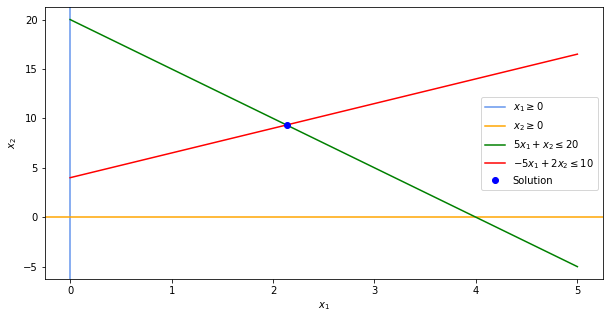

In [6]:
solution = model_linear['x']
x_1 = np.linspace(0, 5, 10)
x_2 = x_1

x_21 = 20 - 5*x_1
x_22 = (8 + 5*x_1) / 2
 
fig = plt.figure(figsize = (10, 5))

plt.axvline(x = 0, color ='cornflowerblue', label = r'$x_1 \geq 0$')
plt.axhline(y = 0, color ='orange', label = r'$x_2 \geq 0$')
plt.plot(x_1, x_21, color='green', label=r'$5x_1 + x_2 \leq 20$')
plt.plot(x_1, x_22, color='red', label=r'$-5x_1 + 2x_2 \leq 10$')
plt.plot(solution[0], solution[1], 'bo', label=r'Solution')
# plt.fill_between(x_1, x_21, x_22, where=(x_21>0) & (x_21<x_1)  , color='grey', alpha=0.5)
 
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
           
plt.show()

### Ejemplo 1.2 Optimizar el mismo problema con la librería PULP

El primer paso es declarar el problema, LpMaximize para el caso de maximizar la función y LpMinimize en el contrario.

In [7]:
prob = LpProblem('Ejemplo_1_2', LpMaximize)

A continuación, se declaran las variables:
1- La lista con los nombres de las variables
2- Diccionario de variables. La función genera un diccionario con las keys tomadas de los str de la lista del paso 1 y unos values con los mismos nombre el prefijo "var_"" (puede ser un str con cualquier nombre). Además podemos fijar el límite inferior y superior y el tipo de variable (i.e. Continuous o Integer)

In [8]:
variables = ['x_1', 'x_2']
variables_vars = LpVariable.dicts("var", variables, lowBound=0, cat='Continuous')
variables_vars

{'x_1': var_x_1, 'x_2': var_x_2}

Creación de la función objetivo

In [9]:
c = dict(zip(variables,[3,1]))
prob += lpSum([variables_vars[i]*c[i] for i in variables])

Declaración de un diccionario para cada restricción:
$$ 5x_1 + x_2 \leq 20 $$
$$ -5x_1 + 2x_2 \leq 8 $$

In [10]:
restriction_1 = dict(zip(variables, [5, 1]))
restriction_2 = dict(zip(variables, [-5, 2]))
prob += lpSum([variables_vars[x]*restriction_1[x] for x in variables]) <= 20, "restriccion_1"
prob += lpSum([variables_vars[x]*restriction_2[x] for x in variables]) <= 8, "restriccion_2"
prob

Ejemplo_1_2:
MAXIMIZE
3*var_x_1 + 1*var_x_2 + 0
SUBJECT TO
restriccion_1: 5 var_x_1 + var_x_2 <= 20

restriccion_2: - 5 var_x_1 + 2 var_x_2 <= 8

VARIABLES
var_x_1 Continuous
var_x_2 Continuous

Cálculo de la solución

In [11]:
prob.solve()
LpStatus[prob.status]

'Optimal'

In [12]:
for var in prob.variables():
    print(f'Variable name: {var.name} , Variable value : {var.value()}n')
print('')
#We can also see the slack variables of the constraints
for name, con in prob.constraints.items():
    print(f'constraint name:{name}, constraint value:{con.value()}n')
print('')
## OBJECTIVE VALUE
print(f'OBJECTIVE VALUE IS: {prob.objective.value()}')

Variable name: var_x_1 , Variable value : 2.1333333n
Variable name: var_x_2 , Variable value : 9.3333333n

constraint name:restriccion_1, constraint value:-2.0000000056086265e-07n
constraint name:restriccion_2, constraint value:1.0000000116860974e-07n

OBJECTIVE VALUE IS: 15.733333199999999


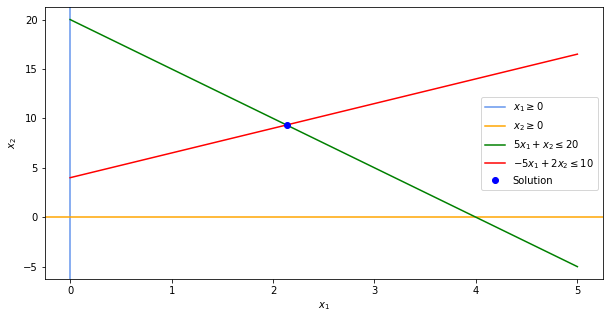

In [13]:
solution = [prob.variables()[0].value(),
            prob.variables()[1].value()]

x_1 = np.linspace(0, 5, 10)
x_2 = x_1

restriction_1 = 20 - 5*x_1
restriction_2 = (8 + 5*x_1) / 2
 
fig = plt.figure(figsize = (10, 5))

plt.axvline(x = 0, color ='cornflowerblue', label = r'$x_1 \geq 0$')
plt.axhline(y = 0, color ='orange', label = r'$x_2 \geq 0$')
plt.plot(x_1, restriction_1, color='green', label=r'$5x_1 + x_2 \leq 20$')
plt.plot(x_1, restriction_2, color='red', label=r'$-5x_1 + 2x_2 \leq 10$')
plt.plot(solution[0], solution[1], 'bo', label=r'Solution')
# plt.fill_between(x_1, x_21, x_22, where=(x_21>0) & (x_21<x_1)  , color='grey', alpha=0.5)
 
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
           
plt.show()

### Ejemplo 1.3 Caso MILP
En este caso se obtienen los resultados para variable con números enteros
$$ \space \space \max_{x_1,x_2}{3x_1+x_2} $$
$$ 5x_1 + x_2 \leq 20 $$
$$ -5x_1 + 2x_2 \leq 8 $$
$$ x_1 , x_2 \geq 0 $$
$$ x_1 , x_2 \in \mathbb{Z} $$

Optimal
Variable name: var_x_1 , Variable value : 2.0n
Variable name: var_x_2 , Variable value : 9.0n

constraint name:restriccion_1, constraint value:-1.0n
constraint name:restriccion_2, constraint value:0.0n

OBJECTIVE VALUE IS: 15.0


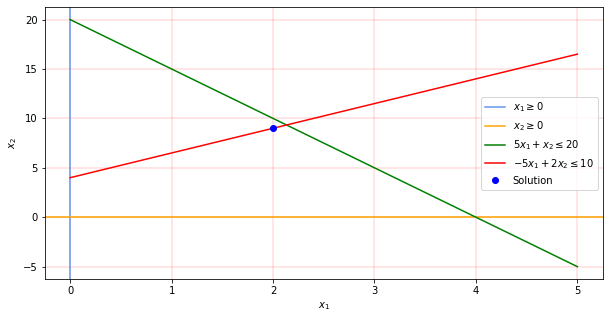

In [14]:
prob = LpProblem('Ejemplo_1_2', LpMaximize)
variables = ['x_1', 'x_2']
variables_vars = LpVariable.dicts("var",variables,lowBound=0,cat='Integer')

c = dict(zip(variables,[3,1]))
prob += lpSum([variables_vars[i]*c[i] for i in variables])

restriction_1 = dict(zip(variables, [5, 1]))
restriction_2 = dict(zip(variables, [-5, 2]))
prob += lpSum([variables_vars[x]*restriction_1[x] for x in variables]) <= 20, "restriccion_1"
prob += lpSum([variables_vars[x]*restriction_2[x] for x in variables]) <= 8, "restriccion_2"

prob.solve()
print(LpStatus[prob.status])

for var in prob.variables():
    print(f'Variable name: {var.name} , Variable value : {var.value()}n')
print('')
#We can also see the slack variables of the constraints
for name, con in prob.constraints.items():
    print(f'constraint name:{name}, constraint value:{con.value()}n')
print('')
## OBJECTIVE VALUE
print(f'OBJECTIVE VALUE IS: {prob.objective.value()}')


solution = [prob.variables()[0].value(),
            prob.variables()[1].value()]

x_1 = np.linspace(0, 5, 10)
x_2 = x_1

restriction_1 = 20 - 5*x_1
restriction_2 = (8 + 5*x_1) / 2
 
fig = plt.figure(figsize = (10, 5))

plt.axvline(x = 0, color ='cornflowerblue', label = r'$x_1 \geq 0$')
plt.axhline(y = 0, color ='orange', label = r'$x_2 \geq 0$')
plt.plot(x_1, restriction_1, color='green', label=r'$5x_1 + x_2 \leq 20$')
plt.plot(x_1, restriction_2, color='red', label=r'$-5x_1 + 2x_2 \leq 10$')
plt.plot(solution[0], solution[1], 'bo', label=r'Solution')

# plt.fill_between(x_1, x_21, x_22, where=(x_21>0) & (x_21<x_1)  , color='grey', alpha=0.5)
 
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(color='r', linestyle='-', linewidth=0.2)

plt.show()